# Analysis on FAO Agricultural Production data

This notebook aims at using other notebooks and python code of this project to establish an global analysis on agricultural production in the world from 1961 to 2023.  
This project uses data from [Food and Agriculture Organization (FAO)](https://www.fao.org/home/en/) of the United Nation  

In [1]:
import sys 
from pathlib import Path

project_folder = str(Path().resolve().parent)
if not project_folder in sys.path:
    sys.path.append(str(Path().resolve().parent))

In [2]:
%load_ext autoreload
%autoreload 2

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.data_utils import load_prod_data_utils
from src.analysis_utils import merge_former_ussr_countries, get_top_producers

In [8]:
df_prod, country_groups, item_groups = load_prod_data_utils()

✅ Data loaded for production


## Introduction

Text to be written

Analysis run on Production Crops ... only on "production" data, results are all shown in Gtons if not specified

***Specific note on USSR and former constitutive countries***  
In this analysis, we will keep the specific production for USSR (1961-1991), Russia (1992-2023) and Ukraine (1992-2023), based on their relative high production volumes. Production from other countries from former USSR countries will be aggregated in an unique Area name "Former USSR Countries". 

In [107]:
df_prod = merge_former_ussr_countries(df_prod)

## Global evolution of production over time

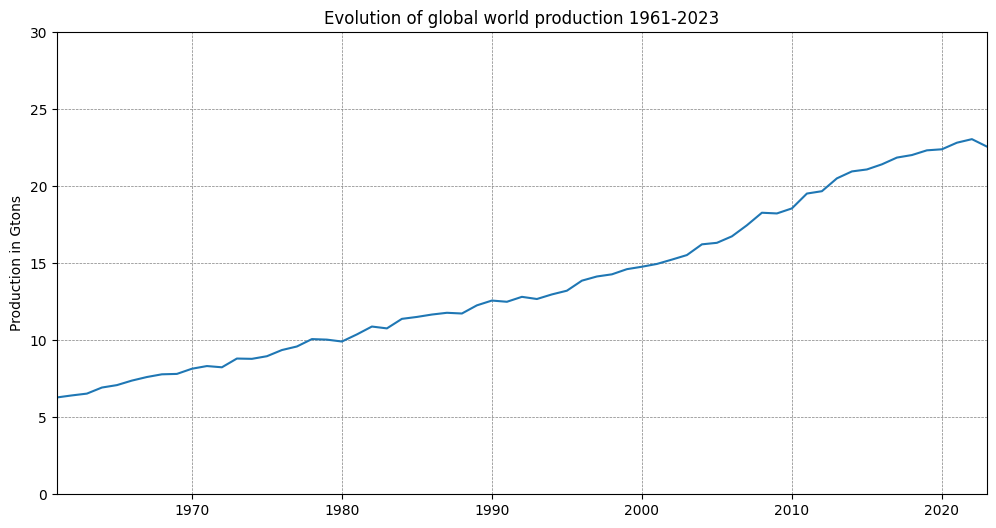

In [108]:
global_prod = df_prod[df_prod["Area"]=="World"].groupby("Year").sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=global_prod, x="Year", y="Value")
plt.grid(color="grey", lw=0.5, ls="--")
plt.title("Evolution of global world production 1961-2023")
plt.xlim([1961,2023])
plt.xlabel(None)
plt.ylim([0,30])
plt.ylabel("Production in Gtons")
plt.show()

The production across the globe went from around 6.3 Gtons in 1961 to 22.5 Gtons in 2023 with a peak at 23 Gtons in 2022. That is a increase by a 3.6 factor on this period.  
Comparatively, th global population went from 1961 (3.06 billion people) to 2023 (8.06 billion people), which is only a 2.6 factor. 

This might indicates that the global production increased faster than population. To go further, one can analyzes: 
- The access to food for all people and the evolution (and decrease) of bad nutrition across the globe on this period
- The nourishing power for each food product (one product might have a greater nourishing power than another one at the same weight) and their evolution during this period
- The evolution of agricultural practices and the increase in yield


*Source on global population: [WorldBank](https://data.worldbank.org/indicator/SP.POP.TOTL)*

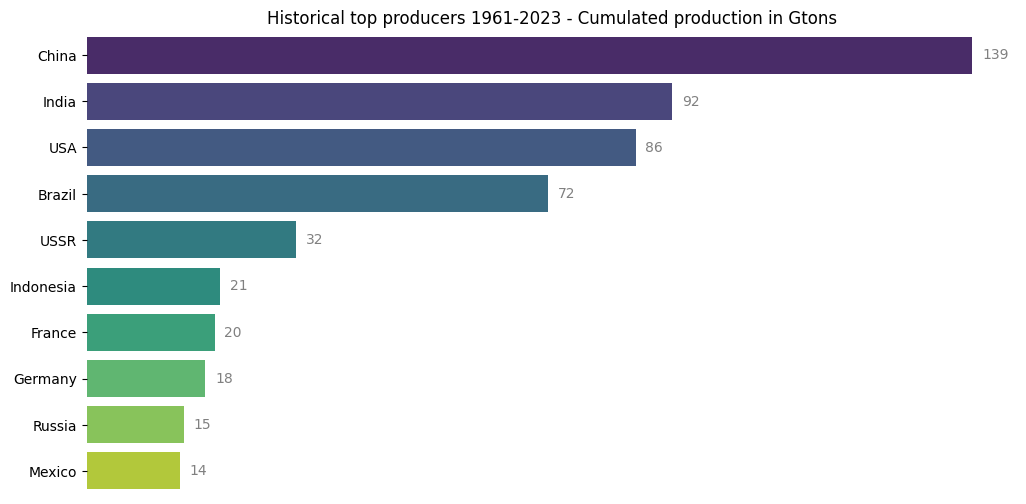

In [109]:
top_global_producers = get_top_producers(df_prod, country_groups, period=(1961,2023), top_n=10)

plt.figure(figsize=(12,6))

custom_labels = ["China","India","USA","Brazil","USSR","Indonesia","France","Germany","Russia","Mexico"]

ax = sns.barplot(x=top_global_producers["Value"], y=top_global_producers.index, palette="viridis")
ax.set_yticks(ax.get_yticks(), labels=custom_labels)
ax.set_xticks([])
plt.title("Historical top producers 1961-2023 - Cumulated production in Gtons")
plt.xlabel(None)
plt.ylabel(None)
plt.grid(False)
ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
ax.bar_label(ax.containers[0], fmt="%d", color="grey", padding=7) 

plt.show()

The global production is largely domniated by China (139 Gtons on the period), far away from Inda (92 Gtons) and the USA (86 Gtons). This underlines an Asian dynamic preponderance. USSR is still in Top10 in this period even if exploded in 1991. Russian Federation is also present as top 9, reflecting it maintained an important agricultural production.   
Other countries formed the end of this ranking, but it needs a tendency analysis to check if it is due to former or newer important production volumes. For instance, were Brazil and Indonesia always in top 10 or are they emerging countries ? What about France and Germany ?